In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

df = pd.read_csv("data/health_study_dataset.csv")
np.random.seed(25)

### Uträkning av medel, median, min och max för age, weight, heigh, systolic_bp och cholesterol

In [2]:
def get_stats(s):
    arr = np.array(s.dropna())
    return {
        'mean': np.mean(arr),
        'median': np.median(arr),
        'min': np.min(arr),
        'max': np.max(arr)
    }

stats_age = get_stats(df.age)
stats_weight = get_stats(df.weight)
stats_height = get_stats(df.height)
stats_systolic_bp = get_stats(df.systolic_bp)
stats_cholesterol = get_stats(df.cholesterol)


print(f"Age\nmean: {stats_age["mean"]}\nmedian: {stats_age["median"]}\nmin: {stats_age["min"]}\nmax: {stats_age["max"]}\n")
print(f"Weight\nmean: {stats_weight["mean"]}\nmedian: {stats_weight["median"]}\nmin: {stats_weight["min"]}\nmax: {stats_weight["max"]}\n")
print(f"Height\nmean: {stats_height["mean"]}\nmedian: {stats_height["median"]}\nmin: {stats_height["min"]}\nmax: {stats_height["max"]}\n")
print(f"Systolic BP\nmean: {stats_systolic_bp["mean"]}\nmedian: {stats_systolic_bp["median"]}\nmin: {stats_systolic_bp["min"]}\nmax: {stats_systolic_bp["max"]}\n")
print(f"Cholesterol\nmean: {stats_cholesterol["mean"]}\nmedian: {stats_cholesterol["median"]}\nmin: {stats_cholesterol["min"]}\nmax: {stats_cholesterol["max"]}\n")

Age
mean: 49.42625
median: 50.0
min: 18
max: 90

Weight
mean: 73.413
median: 73.2
min: 33.7
max: 114.4

Height
mean: 171.84925000000004
median: 171.35000000000002
min: 144.4
max: 200.4

Systolic BP
mean: 149.178625
median: 149.4
min: 106.8
max: 185.9

Cholesterol
mean: 4.92915
median: 4.97
min: 2.5
max: 7.88



### Histogram över blodtryck

Text(0, 0.5, 'Antal')

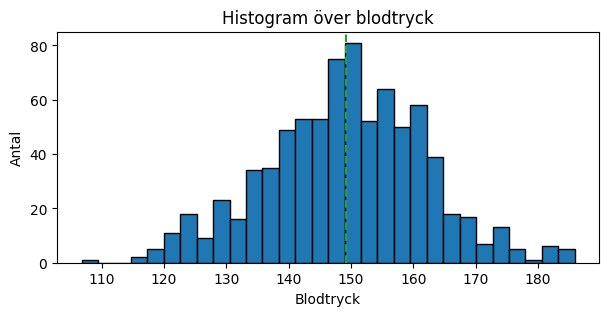

In [3]:
fig, ax = plt.subplots(figsize=(7,3))

data = df.systolic_bp

ax.hist(data, bins=30, edgecolor="black")
ax.axvline(stats_systolic_bp["mean"], color="tab:green", linestyle="--", label="Mean")
ax.set_title("Histogram över blodtryck")
ax.set_xlabel("Blodtryck")
ax.set_ylabel("Antal")

### Boxplot över vikt per kön

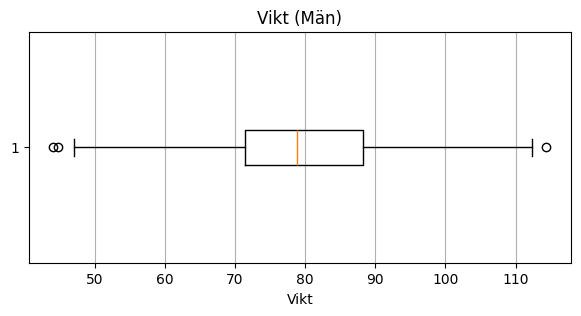

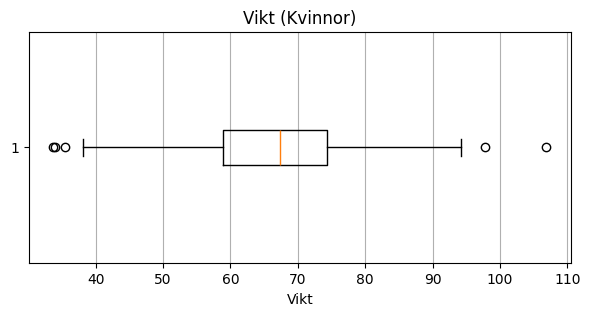

In [4]:
male_weights = df.loc[df["sex"] == "M", "weight"].to_numpy()
female_weights = df.loc[df["sex"] == "F", "weight"].to_numpy()

fig, ax = plt.subplots(figsize=(7,3))
ax.boxplot(male_weights, vert=False)
ax.set_title("Vikt (Män)")
ax.set_xlabel("Vikt")
ax.grid(axis="x")

fig, ax = plt.subplots(figsize=(7,3))
ax.boxplot(female_weights, vert=False)
ax.set_title("Vikt (Kvinnor)")
ax.set_xlabel("Vikt")
ax.grid(axis="x")

### Stapeldiagram över andelen rökare

Text(0.5, 0, 'Grupper')

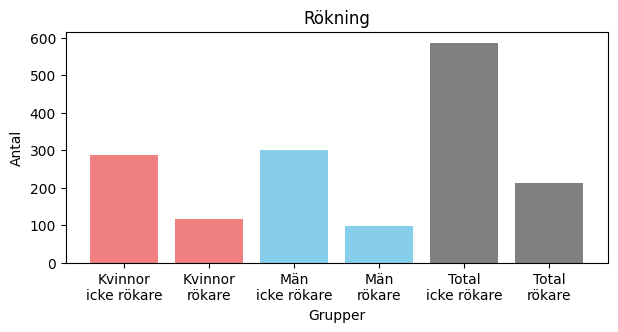

In [5]:
female_smoke_non_smoke = df.loc[df["sex"] == "F", "smoker"].to_numpy()
male_smoke_non_smoke = df.loc[df["sex"] == "M", "smoker"].to_numpy()

female_non_smoker = np.sum(female_smoke_non_smoke == "No")
female_smoker = np.sum(female_smoke_non_smoke == "Yes")
male_non_smoker = np.sum(male_smoke_non_smoke == "No")
male_smoker = np.sum(male_smoke_non_smoke == "Yes")
total_smokers = female_smoker + male_smoker
total_non_smokers = female_non_smoker + male_non_smoker

labels = [
    "Kvinnor\nicke rökare",
    "Kvinnor\nrökare",
    "Män\nicke rökare",
    "Män\nrökare",
    "Total\nicke rökare",
    "Total\nrökare"
    ]

values = [
    female_non_smoker, female_smoker, 
    male_non_smoker, male_smoker,
    total_non_smokers, total_smokers
    ]

colors = [
    "lightcoral", "lightcoral",
    "skyblue", "skyblue",
    "gray", "gray"
    ]


fig, ax = plt.subplots(figsize=(7,3))
ax.bar(labels, values, color=colors)
ax.set_title("Rökning")
ax.set_ylabel("Antal")
ax.set_xlabel("Grupper")

### Simulering

In [6]:
people_with_disease = df.loc[df["disease"] == 1]
people_without_disease = df.loc[df["disease"] == 0]
print(f"{len(people_with_disease)} utan: {len(people_without_disease)}")
true_disease_chance = len(people_with_disease) / (len(people_with_disease) + len(people_without_disease))

simulation = np.random.binomial(n=1, p=true_disease_chance, size=1000)
std = np.sqrt(1000 * true_disease_chance * (1 - true_disease_chance))

print(f"Antal människor med sjukdom från dataset: {len(people_with_disease)}\nVilket är {true_disease_chance*100:.2f}% av populationen\n")
print(f"Antal människor med sjukdom från simulering: {simulation.sum()}\nVilket är {simulation.sum()/1000*100:.2f}% av stickprovet\n")
print(f"Standard avvikelsen är: {std:.1f}\nFörväntade fall från simuleringen var: {true_disease_chance*1000}\n")
print(f"Faktiska fall ifrån simuleringen var {simulation.sum()}")
print(f"Som faller in under normalintervallet: {(true_disease_chance*1000 - std):.1f} - {(true_disease_chance*1000 + std):.1f}")

47 utan: 753
Antal människor med sjukdom från dataset: 47
Vilket är 5.88% av populationen

Antal människor med sjukdom från simulering: 63
Vilket är 6.30% av stickprovet

Standard avvikelsen är: 7.4
Förväntade fall från simuleringen var: 58.75

Faktiska fall ifrån simuleringen var 63
Som faller in under normalintervallet: 51.3 - 66.2


### Konfidensintervall för medelvärdet av systolic_bp med Bootstrap

In [7]:
systolic_bp = df.systolic_bp
true_mean = float(np.mean(systolic_bp))
sample = np.random.choice(systolic_bp, 40)

Bootstrap-CI: 142.9 - 151.1
Stickprovsmedel: 147.0     Sant medel: 149.2


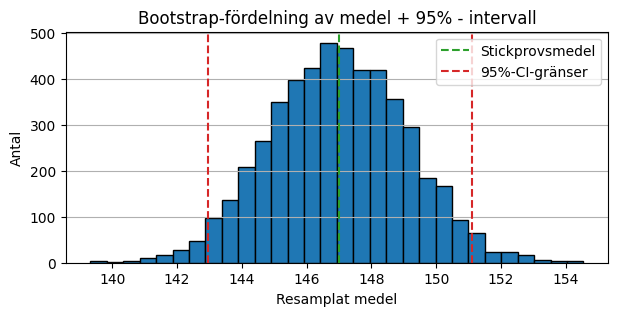

In [8]:
def ci_mean_bootstrap(x, B=5000, confidence=0.95):
    x = np.asarray(x, dtype=float)
    n = len(x)
    boot_means = np.empty(B)
    for b in range(B):
        boot_sample = np.random.choice(x, size=n, replace=True)
        boot_means[b] = np.mean(boot_sample)

    alpha = (1 - confidence) / 2
    lo, hi = np.percentile(boot_means, [100*alpha, 100*(1 - alpha)])
    return float(lo), float(hi), float(np.mean(x)), boot_means

blo, bhi, bmean, boot_means = ci_mean_bootstrap(sample)

fig, ax = plt.subplots(figsize=(7,3))

ax.hist(boot_means, bins=30, edgecolor="black")
ax.axvline(bmean, color="tab:green", linestyle="--", label="Stickprovsmedel")
ax.axvline(blo, color="tab:red", linestyle="--", label="95%-CI-gränser")
ax.axvline(bhi, color="tab:red", linestyle="--")
ax.set_title("Bootstrap-fördelning av medel + 95% - intervall")
ax.set_xlabel("Resamplat medel")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
ax.legend()

print(f"Bootstrap-CI: {blo:.1f} - {bhi:.1f}")
print(f"Stickprovsmedel: {bmean:.1f}     Sant medel: {true_mean:.1f}")

### Konfidensintervall för medelvärdet av systolic_bp med normalapproximation

Normalaprroximation-CI: 142.8 - 151.2
Stickprovsmedel: 147.0     Sant medel: 149.2


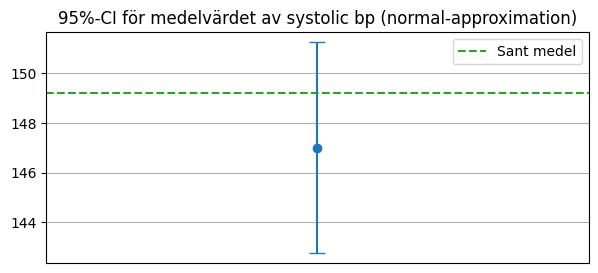

In [9]:
def ci_mean_normal(x):
    x = np.asarray(x, dtype=float)
    mean_x = float(np.mean(x))
    s = float(np.std(x, ddof=1))
    n = len(x)

    z_critical = 1.96
    half_width = z_critical * s / sqrt(n)
    lo, hi = mean_x - half_width, mean_x + half_width
    return lo, hi, mean_x, s, n

lo, hi, mean_x, s, n = ci_mean_normal(sample)

fig, ax = plt.subplots(figsize=(7, 3))
ax.errorbar([0], [mean_x], yerr=[[mean_x - lo], [hi - mean_x]], fmt="o", capsize=6)
ax.axhline(true_mean, color="tab:green", linestyle="--", label="Sant medel")
ax.set_xticks([])
ax.grid(True, axis="y")
ax.legend()
ax.set_title("95%-CI för medelvärdet av systolic bp (normal-approximation)")

print(f"Normalaprroximation-CI: {lo:.1f} - {hi:.1f}")
print(f"Stickprovsmedel: {mean_x:.1f}     Sant medel: {true_mean:.1f}")

In [10]:
def covers_true_mean(method = "", n=40, trials=200):
    hits = 0
    for _ in range(trials):
        trial_sample = np.random.choice(systolic_bp, size=n, replace=True)
        if method == "normal":
            lo, hi, *_ = ci_mean_normal(trial_sample)
        else:
            lo, hi, *_ = ci_mean_bootstrap(trial_sample, B=1500)
        hits += (lo <= true_mean <= hi)
    return hits / trials

cov_normal = covers_true_mean("normal")
cov_boot = covers_true_mean("bootstrap")

cov_normal, cov_boot

(0.97, 0.935)

### Jämförelse av bootstrap och normalapproximation
Beräknade 95% konfidensintervall för medelvärdet med både bootstrap och normalapproximation.
Båda metoderna gav nästan identiska intervall:

**Bootstrap-CI: 142.9 - 151.1**

**Normalapproximation-CI: 142.8-151.2**

Även simuleringen av 200 upprepningar för att se hur ofta intervallen täcker det sanna medelvärdet visade liknande, normalapproximation: **97%** samt bootstrap: **~94%**.

### Hypotesprövning

In [11]:
bp_smoker = df.loc[df["smoker"] == "Yes", "systolic_bp"].to_numpy()
bp_non_smoker = df.loc[df["smoker"] == "No", "systolic_bp"].to_numpy()

n_boot = 10_000
obs_diff = bp_smoker.mean() - bp_non_smoker.mean()

boot_diffs = np.empty(n_boot)
for i in range(n_boot):
    Smoker_sample = np.random.choice(bp_smoker, size=len(bp_smoker), replace=True)
    Non_smoker_sample = np.random.choice(bp_non_smoker, size=len(bp_non_smoker), replace=True)
    boot_diffs[i] = Smoker_sample.mean() - Non_smoker_sample.mean()

p_boot = np.mean(boot_diffs <= 0)

ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

print(obs_diff)
print(p_boot)
print(f"ci low: {float(ci_low):.1f} | ci high: {float(ci_high):.1f}")

0.47190136846063524
0.3317
ci low: -1.6 | ci high: 2.5


### Resultat
Jag använde mig av bootstrap metoden (10 000 stickprov) för att testa hypotesen att rökare har ett högre medel-blodtryck än icke rökare.

Den observerade skillnaden i medelvärde var **0.47** (rökare - icke-rökare). Envägs bootstrap-p-värdet blev **0.33**, vilket är så pass högt att hypotesen inte får stöd. 

Det 95-procentiga konfidensintervallet (**-1.6 till 2.5**) inkluderar dessutom noll.

### Slutsats
Det finns inget statistiskt stöd för att rökare har ett högre medel-blodtryck än icke rökare.

